### Equipo 8
- Monica Angeles Sanchez
- María del Carmen Huitrón Domingo

# COVID 19 en México

* MODULO II  (PROCESAMIENTO DE DATOS CON PYTHON)
* MODULO III (ANALISIS DE DATOS CON PYTHON)






PROBLEMA: La pandemia de COVID 19 resaltó las
diferencias que existen en el sistema
de salud de cada país y de la eficacia
de las medidas que cada uno toma
para lograr que su población se
recupere.

PREGUNTAS:
¿Cuál es la media, la mediana y el rango de los casos confirmados, muertes y recuperaciones en el dataset?
¿Cuáles son los paises con mayor numero de muertes?
¿Cuáles son los paises con mayor numero de recuperaciones?


# ESTIMADOS DE LOCACIÓN Y VARIABILIDAD


* Realiza una limpieza general de tu dataset (eliminación de NaNs, renombramiento de índice y columnas, formateo de strings, etc) para que esté listo para ser analizado.




In [1]:
# Biblioteca
import pandas as pd
import numpy as np
from IPython.display import display
from scipy import stats
# Cargamos la base de datos
try:
  df = pd.read_csv("2019 COVID.csv")
  display(df)
except Exception as e:
  print("verifica la ruta del archivo")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,03/03/2020 12:00,Hubei,Mainland China,2020-03-03T11:43:02,67217,2835,36208,30.9756,112.2707
1,03/03/2020 12:00,NaN,South Korea,2020-03-03T09:43:02,5186,28,30,36.0000,128.0000
2,03/03/2020 12:00,NaN,Italy,2020-03-03T20:03:06,2502,79,160,43.0000,12.0000
3,03/03/2020 12:00,NaN,Iran,2020-03-03T14:23:03,2336,77,291,32.0000,53.0000
4,03/03/2020 12:00,Guangdong,Mainland China,2020-03-03T10:23:10,1350,7,1101,23.3417,113.4244
...,...,...,...,...,...,...,...,...,...
4704,22/01/2020 00:00,Heilongjiang,Mainland China,1/22/2020 0:00,0,0,0,NaN,NaN
4705,22/01/2020 00:00,NaN,Japan,1/22/2020 0:00,1,0,0,NaN,NaN
4706,22/01/2020 00:00,NaN,Thailand,1/22/2020 0:00,2,0,0,NaN,NaN
4707,22/01/2020 00:00,NaN,South Korea,1/22/2020 0:00,1,0,0,NaN,NaN


Lectura finalizada


In [2]:
df = df[['Province','Region','Confirmed','Deaths','Recovered']]
df

,Province,Region,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,67217,2835,36208
1,NaN,South Korea,5186,28,30
2,NaN,Italy,2502,79,160
3,NaN,Iran,2336,77,291
4,Guangdong,Mainland China,1350,7,1101
...,...,...,...,...,...
4704,Heilongjiang,Mainland China,0,0,0
4705,NaN,Japan,1,0,0
4706,NaN,Thailand,2,0,0
4707,NaN,South Korea,1,0,0


In [3]:
# Panorama general de los datos.
def info_general_df(df):
  print('Información general del DataFrame')
  print(f'Cantidad de filas y columnas: {df.shape}')
  print("-"*50)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*50)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print("-"*50)
  print(f'Tipos de datos por columna: \n{df.dtypes}')

info_general_df(df)

Información general del DataFrame
Cantidad de filas y columnas: (4709, 5)
--------------------------------------------------
Cantidad de datos nulos por columna: 
Province     1435
Region          0
Confirmed       0
Deaths          0
Recovered       0
dtype: int64
--------------------------------------------------
Cantidad de datos únicos por columna: 
Province      94
Region        84
Confirmed    591
Deaths        69
Recovered    423
dtype: int64
--------------------------------------------------
Tipos de datos por columna: 
Province     object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object


In [4]:
# Procesamiento de datos faltantes.
data_fillna = {
    'Province': "Desconocido", 
}

# Usar fillna con el diccionario
df.fillna(data_fillna, inplace=True)
# Verificar la cantidad de nulos restantes
print(df.isnull().sum())
print("-"*50)
display(df.dtypes)
print("-"*150)
display(df)

Province     0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64
--------------------------------------------------


Province     object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

------------------------------------------------------------------------------------------------------------------------------------------------------


,Province,Region,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,67217,2835,36208
1,Desconocido,South Korea,5186,28,30
2,Desconocido,Italy,2502,79,160
3,Desconocido,Iran,2336,77,291
4,Guangdong,Mainland China,1350,7,1101
...,...,...,...,...,...
4704,Heilongjiang,Mainland China,0,0,0
4705,Desconocido,Japan,1,0,0
4706,Desconocido,Thailand,2,0,0
4707,Desconocido,South Korea,1,0,0


In [5]:
info_general_df(df)

Información general del DataFrame
Cantidad de filas y columnas: (4709, 5)
--------------------------------------------------
Cantidad de datos nulos por columna: 
Province     0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64
--------------------------------------------------
Cantidad de datos únicos por columna: 
Province      95
Region        84
Confirmed    591
Deaths        69
Recovered    423
dtype: int64
--------------------------------------------------
Tipos de datos por columna: 
Province     object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object


DATOS NUMÉRICOS

In [6]:
# Identificar columnas con datos numéricos
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
# Crear un DataFrame con los nombres de las columnas numéricas
df_columnas_numericas = pd.DataFrame(columnas_numericas, columns=['Columnas Numéricas'])
# Aplicar estilo para centrar el contenido
styled_table = df_columnas_numericas.style.set_properties(**{'text-align': 'center'})
# Mostrar la tabla
display(styled_table)

,Columnas Numéricas
0,Confirmed
1,Deaths
2,Recovered


 **CÁLCULO DE MÉTRICAS Y RANGO DE DATOS**

**Estimados de columnas numéricas:**

* Promedio
* Mediana
* Media Truncada
* Desviación estándar
* Rango
* Percentiles 25 y 75 (por lo menos)
* Rango intercuartil

In [7]:
# Crear un diccionario para almacenar los resultados
resultados = {}
# Calcular estadísticas para cada columna numérica
for columna in columnas_numericas:
    resultados[columna] = {
        'Promedio': df[columna].mean(),
        'Mediana': df[columna].median(),
        'Media Truncada': stats.trim_mean(df[columna], 0.1),
        'Desviación estándar': df[columna].std(),
        'Rango': df[columna].max() - df[columna].min(),
        'Percentil 25': df[columna].quantile(0.25),
        'Percentil 75': df[columna].quantile(0.75),
        'Rango intercuartil': df[columna].quantile(0.75) - df[columna].quantile(0.25)
    }
# Convertir el diccionario en un DataFrame para visualizar mejor los resultados
df_resultados = pd.DataFrame(resultados).T  # Transponer para que las columnas sean las estadísticas

# Mostrar los resultados
display(df_resultados)

,Promedio,Mediana,Media Truncada,Desviación estándar,Rango,Percentil 25,Percentil 75,Rango intercuartil
Confirmed,519.503504,11.0,57.543380,4495.792289,67217.0,2.0,106.0,104.0
Deaths,14.095986,0.0,0.215176,157.865318,2835.0,0.0,0.0,0.0
Recovered,115.961351,1.0,8.111435,1288.022632,36208.0,0.0,10.0,10.0


NÚMERO DE MUERTES POR REGIÓN

In [8]:
# Agrupar por región y calcular el número total de muertes
muertes_por_region = df.groupby('Region')['Deaths'].sum()
# Convertir a DataFrame para una mejor visualización
df_muertes_por_region = muertes_por_region.reset_index()
# Renombrar columnas para mayor claridad
df_muertes_por_region.columns = ['Region', 'Total Muertes']
# Mostrar el DataFrame con el número de muertes por región
display(df_muertes_por_region)

,Region,Total Muertes
0,Azerbaijan,0
1,Afghanistan,0
2,Algeria,0
3,Andorra,0
4,Argentina,0
...,...,...
79,US,15
80,Ukraine,0
81,United Arab Emirates,0
82,United States,0


¿CUÁL ES EL RANGO DE MUERTES?

In [9]:
import pandas as pd
rango_muertes = df_resultados.loc['Deaths', 'Rango']
# Crear un nuevo DataFrame para mostrar el rango de muertes
df_rango_muertes = pd.DataFrame({
    'Métrica': ['Rango de muertes'],
    'Valor': [rango_muertes]
})
# Mostrar el DataFrame con el rango de muertes
display(df_rango_muertes)

,Métrica,Valor
0,Rango de muertes,2835.0


¿CUÁLES SON LOS PAISES CON MAYOR NUMERO DE MUERTES?

In [10]:
# Agrupar por país y calcular el número total de muertes
muertes_por_pais = df.groupby('Region')['Deaths'].sum().reset_index()
# Renombrar columnas para mayor claridad
muertes_por_pais.columns = ['Pais', 'Total Muertes']
# Ordenar los países por el número total de muertes de mayor a menor
muertes_por_pais = muertes_por_pais.sort_values(by='Total Muertes', ascending=False)
# Mostrar las 10 regiones/paises con mayor número de muertes
top_10_muertes_por_pais = muertes_por_pais.head(10)
display(top_10_muertes_por_pais)


,Pais,Total Muertes
47,Mainland China,65325
33,Iran,368
37,Italy,267
71,South Korea,156
60,Others,53
29,Hong Kong,51
39,Japan,47
62,Philippines,43
25,France,28
76,Taiwan,17


¿CUÁL ES EL RANGO DE RECUPERACIONES?

In [12]:
# Calcular el rango de recuperaciones
rango_recuperaciones = df['Recovered'].max() - df['Recovered'].min()
# Crear un DataFrame con el rango de recuperaciones
df_rango_recuperaciones = pd.DataFrame({
    'Métrica': ['Rango de recuperaciones'],
    'Valor': [rango_recuperaciones]
})
# Mostrar el DataFrame con el rango de recuperaciones
display(df_rango_recuperaciones)

,Métrica,Valor
0,Rango de recuperaciones,36208


¿CUÁL ES LA REGIÓN CON MAYOR RECUPERACIÓN?

In [13]:
# Calcular el total de recuperaciones por región
recuperaciones_por_region = df.groupby('Region')['Recovered'].sum()
# Obtener la región con el mayor número de recuperaciones
region_mayor_recuperacion = recuperaciones_por_region.idxmax()
total_recuperaciones = recuperaciones_por_region.max()
# Crear un DataFrame para mostrar el resultado
resultado_recuperaciones = pd.DataFrame({'Región': [region_mayor_recuperacion], 'Total Recuperaciones': [total_recuperaciones]})
# Mostrar el resultado
display(resultado_recuperaciones)


,Región,Total Recuperaciones
0,Mainland China,539448


# DISTRIBUCIONES


*  DISTRIBUCIÓN DE VARIABLES NUMÉRICAS




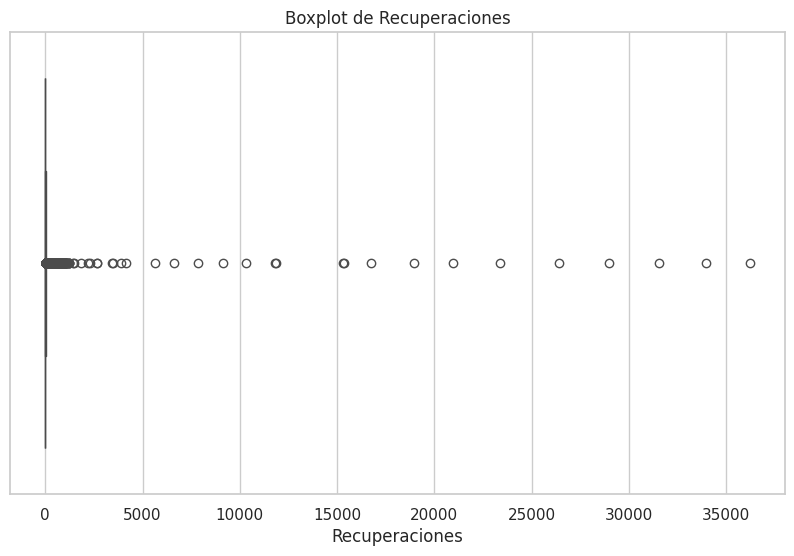

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para las recuperaciones
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Recovered'])
plt.title('Boxplot de Recuperaciones')
plt.xlabel('Recuperaciones')
plt.show()



* Score de Rango Intercuartílico para filtrar valores atípicos




In [15]:
# Calcular cuartiles y rango intercuartílico
Q1 = df['Recovered'].quantile(0.25)
Q3 = df['Recovered'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los valores atípicos
df_filtrado = df[(df['Recovered'] >= limite_inferior) & (df['Recovered'] <= limite_superior)]
# Calcular y comparar medidas antes y después
medidas_originales = {
    'Media': df['Recovered'].mean(),
    'Mediana': df['Recovered'].median(),
    'Desviación Estándar': df['Recovered'].std()
}

medidas_filtradas = {
    'Media': df_filtrado['Recovered'].mean(),
    'Mediana': df_filtrado['Recovered'].median(),
    'Desviación Estándar': df_filtrado['Recovered'].std()
}

# Crear DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Métrica': ['Media', 'Mediana', 'Desviación Estándar'],
    'Original': [medidas_originales['Media'], medidas_originales['Mediana'], medidas_originales['Desviación Estándar']],
    'Filtrado': [medidas_filtradas['Media'], medidas_filtradas['Mediana'], medidas_filtradas['Desviación Estándar']]
})

# Mostrar la tabla de resultados
display(resultados)


,Métrica,Original,Filtrado
0,Media,115.961351,2.274765
1,Mediana,1.000000,0.000000
2,Desviación Estándar,1288.022632,4.849075




*   TABLAS DE FRECUENCIA E HISTOGRAMAS



RECUPERACIONES DEL COVID-19

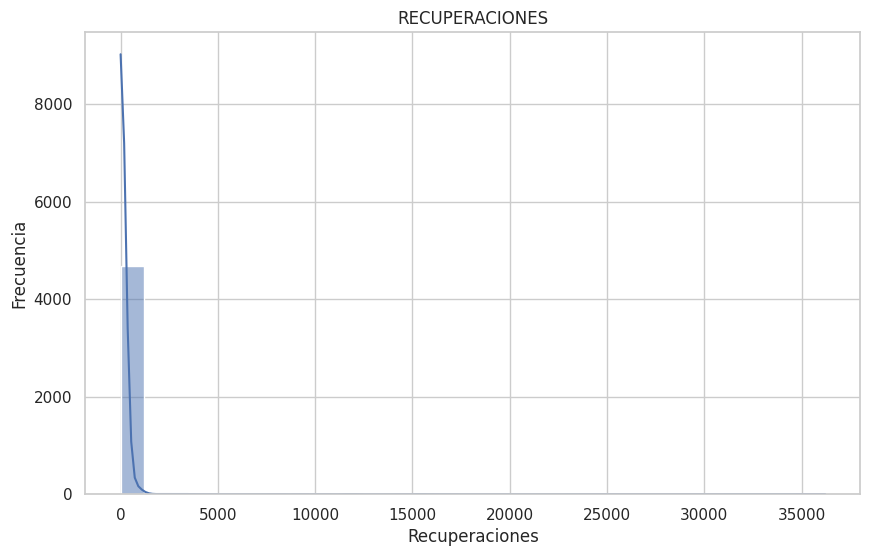

,Recuperaciones,Frecuencia
0,0,2297
1,1,522
2,2,237
3,4,112
4,3,104
...,...,...
419,307,1
420,384,1
421,478,1
422,458,1


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el país con mayor recuperación
recuperaciones_por_pais = df.groupby('Region')['Recovered'].sum()
pais_mayor_recuperacion = recuperaciones_por_pais.idxmax()
total_recuperaciones = recuperaciones_por_pais.max()

# Histograma de las recuperaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['Recovered'], bins=30, kde=True)
plt.title('RECUPERACIONES')
plt.xlabel('Recuperaciones')
plt.ylabel('Frecuencia')

# Anotación en el histograma para indicar el país con mayor recuperación
plt.annotate(f'País: {pais_mayor_recuperacion}\nRecuperaciones: {total_recuperaciones}',
             xy=(total_recuperaciones, 0),
             xytext=(total_recuperaciones + 50, 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

# Tabla de frecuencias
frecuencias = df['Recovered'].value_counts().reset_index()
frecuencias.columns = ['Recuperaciones', 'Frecuencia']

# Agregar una fila con el país con mayor recuperación
fila_pais_mayor_recuperacion = pd.DataFrame({
    'Recuperaciones': [total_recuperaciones],
    'Frecuencia': [1]  # Se puede ajustar según sea necesario
})

# Concatenar la fila del país con la tabla de frecuencias
frecuencias = pd.concat([frecuencias, fila_pais_mayor_recuperacion], ignore_index=True)

# Mostrar la tabla
display(frecuencias)



PAÍS CON MAYOR RECUPERACIÓN



,Región,Total Recuperaciones
0,Mainland China,539448


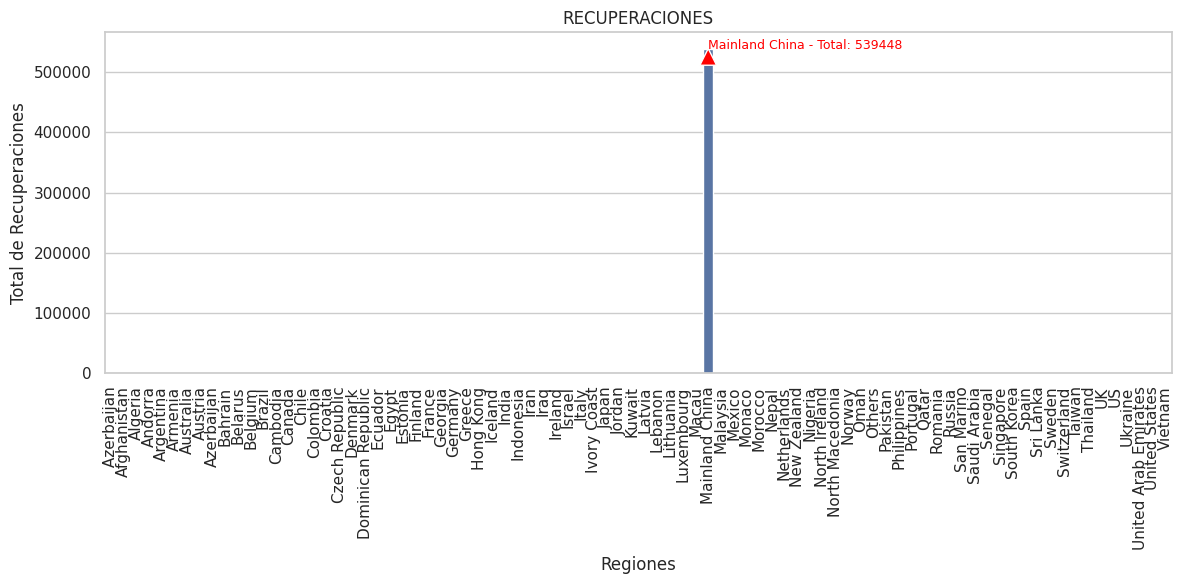

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el total de recuperaciones por región
recuperaciones_por_region = df.groupby('Region')['Recovered'].sum()

# Obtener la región con el mayor número de recuperaciones
region_mayor_recuperacion = recuperaciones_por_region.idxmax()
total_recuperaciones = recuperaciones_por_region.max()

# Crear un DataFrame para mostrar el resultado
resultado_recuperaciones = pd.DataFrame({'Región': [region_mayor_recuperacion], 'Total Recuperaciones': [total_recuperaciones]})

# Mostrar el resultado
display(resultado_recuperaciones)

# Crear un gráfico de barras de recuperaciones por región
plt.figure(figsize=(12, 6))
sns.barplot(x=recuperaciones_por_region.index, y=recuperaciones_por_region.values)
plt.title('RECUPERACIONES')
plt.xlabel('Regiones')
plt.ylabel('Total de Recuperaciones')
plt.xticks(rotation=90)
# Añadir anotación para la región con mayor recuperación
plt.annotate(f'{region_mayor_recuperacion} - Total: {total_recuperaciones}',
             xy=(list(recuperaciones_por_region.index).index(region_mayor_recuperacion), total_recuperaciones),
             xytext=(list(recuperaciones_por_region.index).index(region_mayor_recuperacion), total_recuperaciones + 5),  # Ajustar el valor de +5
             arrowprops=dict(facecolor='red'),
             fontsize=9, color='red')
plt.tight_layout()  # Ajustar el layout
plt.show()




*   MEDIDAS DE ASIMETRÍA Y CURTOSIS


Evaluación de  qué tan alejadas están las  variables de una distribución normal.

In [18]:
from scipy.stats import skew, kurtosis

asimetria = skew(df['Recovered'])
curtosis_valor = kurtosis(df['Recovered'])

print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis_valor}")

Asimetría: 20.396300824379633
Curtosis: 460.65712342896967




*   GRAFICAS DE DENSIDAD




PAISES CON MAYOR NUMERO DE MUERTES

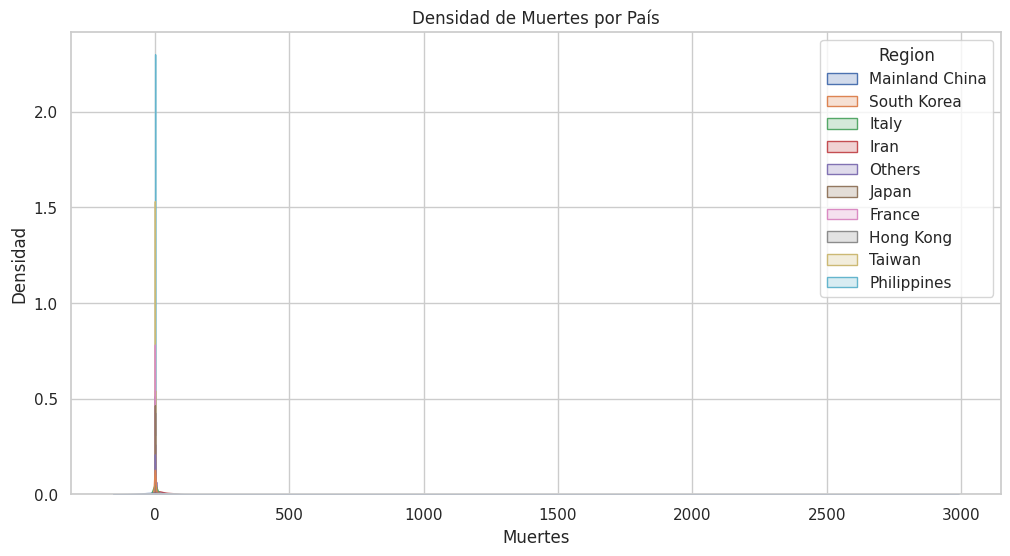

In [19]:
# Calcular el total de muertes por país
muertes_por_pais = df.groupby('Region')['Deaths'].sum().reset_index()
# Filtrar los países con mayor número de muertes
paises_mayores_muertes = muertes_por_pais.nlargest(10, 'Deaths')['Region']
# Filtrar el DataFrame original para incluir solo los países con mayor número de muertes
df_mayores_muertes = df[df['Region'].isin(paises_mayores_muertes)]
# Crear el gráfico de densidad
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_mayores_muertes, x='Deaths', hue='Region', fill=True, common_norm=False)
plt.title('Densidad de Muertes por País')
plt.xlabel('Muertes')
plt.ylabel('Densidad')
plt.show()

#  VARIABLES CATEGORICAS Y ANÁLISIS MULTIVARIABLE



*  INFORMACIÓN COMPLETA Y NULA POR REGIÓN




In [20]:
# Calcular información completa o nula por Región
info_completa_nula = df.isnull().sum().reset_index()
info_completa_nula.columns = ['Columnas', 'Valores Nulos']

# Identificar regiones con información completa o nula
regiones_info_nula = df[df.isnull().any(axis=1)].groupby('Region').count().reset_index()

print("Información completa o nula por Región:")
display(info_completa_nula)
print("\nRegiones con información nula:")
display(regiones_info_nula)


Información completa o nula por Región:


,Columnas,Valores Nulos
0,Province,0
1,Region,0
2,Confirmed,0
3,Deaths,0
4,Recovered,0



Regiones con información nula:


,Region,Province,Confirmed,Deaths,Recovered




*   RANGO DE MUERTES Y RECUPERACIÓN



In [21]:
# Calcular rango de muertes y recuperaciones
rango_muertes = df['Deaths'].max() - df['Deaths'].min()
rango_recuperaciones = df['Recovered'].max() - df['Recovered'].min()

# Crear un DataFrame para mostrar los resultados
rango_resultados = pd.DataFrame({
    'Métrica': ['Rango de Muertes', 'Rango de Recuperaciones'],
    'Valor': [rango_muertes, rango_recuperaciones]
})

print("\nRango de muertes y recuperaciones:")
display(rango_resultados)


Rango de muertes y recuperaciones:


,Métrica,Valor
0,Rango de Muertes,2835
1,Rango de Recuperaciones,36208




*   PAISES CON MAYOR NUMERO DE MUERTES


In [22]:
# Calcular el total de muertes por país
muertes_por_pais = df.groupby('Region')['Deaths'].sum().reset_index()

# Obtener los países con mayor número de muertes
paises_mayores_muertes = muertes_por_pais.nlargest(10, 'Deaths')

print("\nPaíses con mayor número de muertes:")
display(paises_mayores_muertes)



Países con mayor número de muertes:


,Region,Deaths
47,Mainland China,65325
33,Iran,368
37,Italy,267
71,South Korea,156
60,Others,53
29,Hong Kong,51
39,Japan,47
62,Philippines,43
25,France,28
76,Taiwan,17




*   PAISES CON MAYOR NUMERO DE RECUPERACIÓN


In [23]:
# Calcular el total de recuperaciones por país
recuperaciones_por_pais = df.groupby('Region')['Recovered'].sum().reset_index()

# Obtener los países con mayor número de recuperaciones
paises_mayores_recuperaciones = recuperaciones_por_pais.nlargest(10, 'Recovered')

print("\nPaíses con mayor número de recuperaciones:")
display(paises_mayores_recuperaciones)



Países con mayor número de recuperaciones:


,Region,Recovered
47,Mainland China,539448
33,Iran,1051
70,Singapore,969
77,Thailand,630
37,Italy,537
39,Japan,503
71,South Korea,397
29,Hong Kong,303
48,Malaysia,302
83,Vietnam,286




*   TABLAS DE CONTINGENCIA Y MULTIPLES GRAFICAS




Tabla de contingencia:


Deaths,False,True
Region,,
Azerbaijan,1,0
Afghanistan,9,0
Algeria,8,0
Andorra,2,0
Argentina,1,0
...,...,...
US,591,6
Ukraine,1,0
United Arab Emirates,51,0


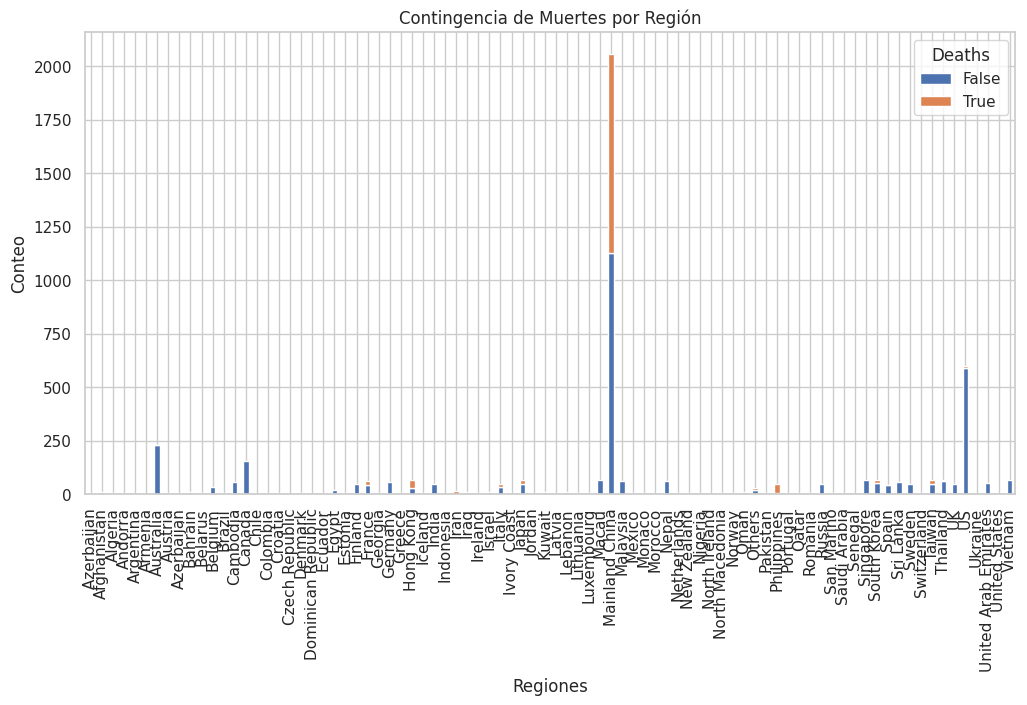

In [24]:
# Crear una tabla de contingencia
contingencia = pd.crosstab(df['Region'], df['Deaths'] > 0)
# Mostrar la tabla de contingencia
print("\nTabla de contingencia:")
display(contingencia)
# Graficar la tabla de contingencia
contingencia.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contingencia de Muertes por Región')
plt.xlabel('Regiones')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()



*  BOXPLOTS Y VIOLINPLOTS

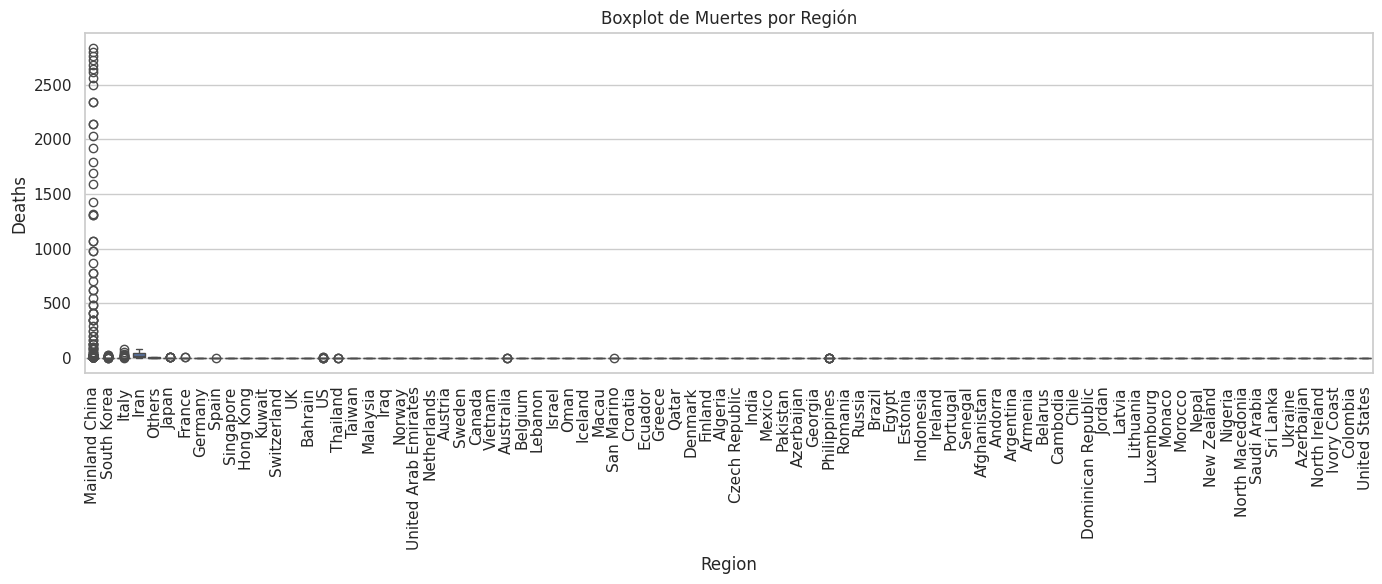

In [25]:
# Crear boxplot y violinplot para explorar combinaciones de variables
# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Region', y='Deaths')
plt.title('Boxplot de Muertes por Región')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

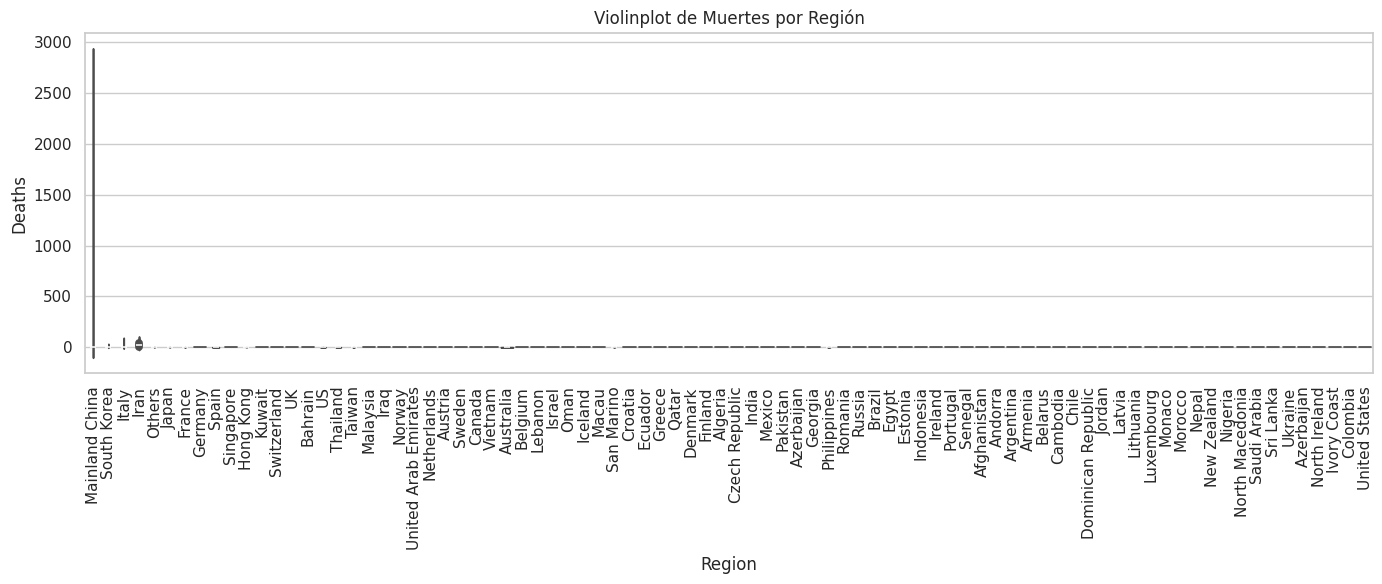

In [26]:
# Violinplot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Region', y='Deaths')
plt.title('Violinplot de Muertes por Región')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# CORRELACIÓN Y REGRESIÓN LINEAL SIMPLE



*  Generar Matriz de Correlaciones y Pairplot



Tipos de datos en el DataFrame:
Province     object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object


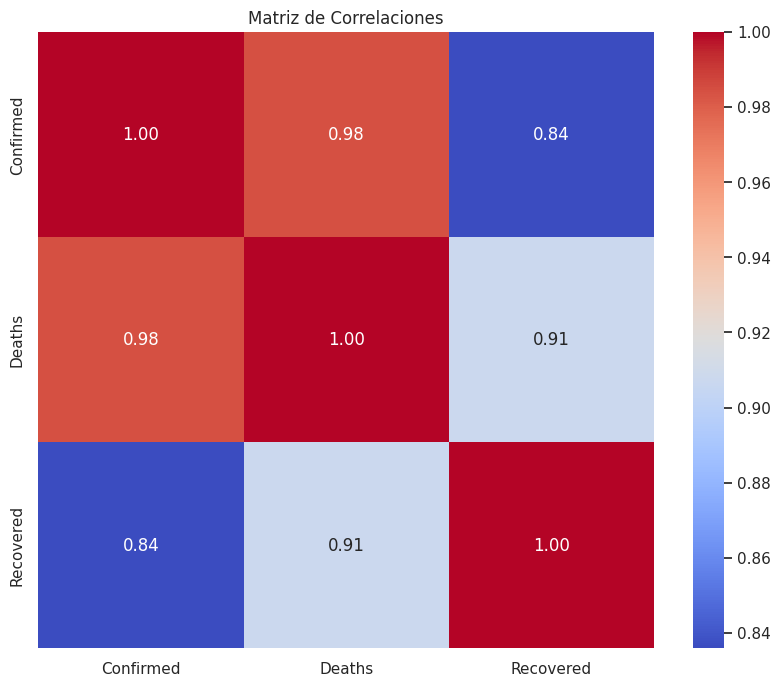

In [27]:

# Mostrar los tipos de datos de cada columna para identificar no numéricas
print("Tipos de datos en el DataFrame:")
print(df.dtypes)
# Filtrar solo columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlaciones
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlaciones')
plt.show()




*   Gráficas de Dispersión y Identificación de Valores Atípicos



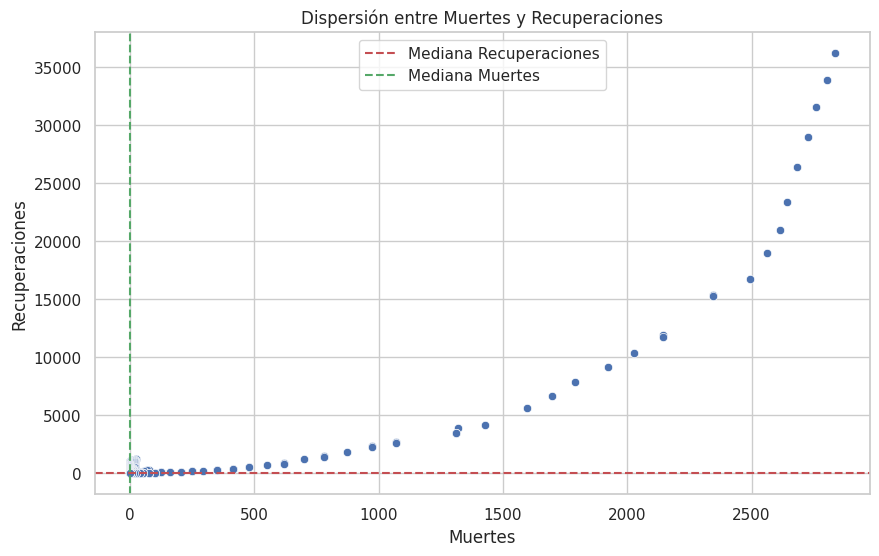

Correlación original:


,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.984409,0.836039
Deaths,0.984409,1.000000,0.907139
Recovered,0.836039,0.907139,1.000000



Correlación después del filtrado:


,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.547727,0.497206
Deaths,0.547727,1.000000,0.278440
Recovered,0.497206,0.278440,1.000000


In [28]:

# Gráfica de dispersión entre muertes y recuperaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Deaths', y='Recovered')
plt.title('Dispersión entre Muertes y Recuperaciones')
plt.xlabel('Muertes')
plt.ylabel('Recuperaciones')
plt.axhline(y=df['Recovered'].median(), color='r', linestyle='--', label='Mediana Recuperaciones')
plt.axvline(x=df['Deaths'].median(), color='g', linestyle='--', label='Mediana Muertes')
plt.legend()
plt.show()

# Identificar valores atípicos usando el IQR para 'Recovered'
Q1 = df['Recovered'].quantile(0.25)
Q3 = df['Recovered'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df_filtrado = df[(df['Recovered'] >= limite_inferior) & (df['Recovered'] <= limite_superior)]

# Comparar la correlación antes y después del filtrado
# Filtrar solo columnas numéricas para la correlación
correlation_original = df.select_dtypes(include=['float64', 'int64']).corr()
correlation_filtrado = df_filtrado.select_dtypes(include=['float64', 'int64']).corr()

print("Correlación original:")
display(correlation_original)
print("\nCorrelación después del filtrado:")
display(correlation_filtrado)




*   ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL



                            OLS Regression Results                            
Dep. Variable:              Recovered   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.187e+04
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:51:34   Log-Likelihood:                -36326.
No. Observations:                4709   AIC:                         7.266e+04
Df Residuals:                    4707   BIC:                         7.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6321      7.931      1.467      0.1

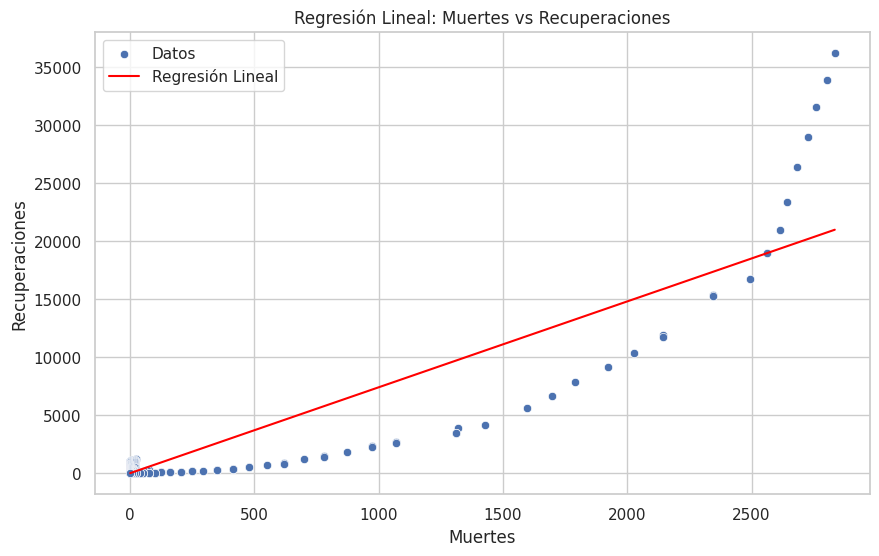

In [29]:
# !pip  install statsmodels
import statsmodels.api as sm
# Preparar los datos para la regresión
X = df['Deaths']
y = df['Recovered']
# Agregar una constante a la variable independiente
X = sm.add_constant(X)
# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
# Resumen del modelo
print(modelo.summary())
# Visualizar la regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Deaths', y='Recovered', label='Datos')
plt.plot(df['Deaths'], modelo.predict(X), color='red', label='Regresión Lineal')
plt.title('Regresión Lineal: Muertes vs Recuperaciones')
plt.xlabel('Muertes')
plt.ylabel('Recuperaciones')
plt.legend()
plt.show()

# DISTRIBUCIONES MUESTRALES Y TECNICAS DE EVALUACION DE MODELOS




*   RECUPERACIONES


Distribución de Recovered:
Asimetría: 0.22910414278499816
Curtosis: 0.11409116770355388
Error estándar: 18.424122551746045
Intervalo de confianza del 95.0%: [79.5908154597579, 153.12303567636442]


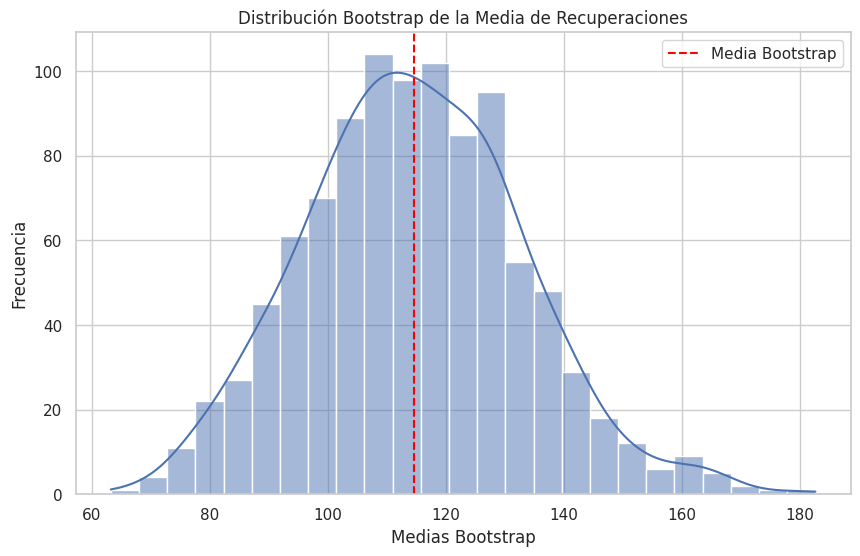

Puntajes de validación cruzada: [   0.66668789    0.53537661   -5.0468084   -49.72807976 -131.44041053]
Promedio de validación cruzada: -37.002646838686076


In [30]:
!pip install -q pandas seaborn matplotlib scikit-learn scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis

# Definir la variable numérica de interés
variable_interes = 'Recovered'
n_bootstrap = 1000
alpha = 0.05  # Nivel de confianza del 95%

# Bootstrap
bootstrap_samples = np.random.choice(df[variable_interes].dropna(),
                                      size=(n_bootstrap, len(df[variable_interes].dropna())),
                                      replace=True)

# Calcular estadísticas de cada muestra bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Asimetría y Curtosis
asimetria = skew(bootstrap_means)
curtosis_val = kurtosis(bootstrap_means)

# Error estándar
error_estandar = np.std(bootstrap_means)

# Intervalo de confianza
ci_lower = np.percentile(bootstrap_means, 100 * (alpha / 2))
ci_upper = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

# Resultados
print(f'Distribución de {variable_interes}:')
print(f'Asimetría: {asimetria}')
print(f'Curtosis: {curtosis_val}')
print(f'Error estándar: {error_estandar}')
print(f'Intervalo de confianza del {100 * (1 - alpha)}%: [{ci_lower}, {ci_upper}]')

# Visualización de la distribución bootstrap
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True)
plt.title('Distribución Bootstrap de la Media de Recuperaciones')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.axvline(x=np.mean(bootstrap_means), color='red', linestyle='--', label='Media Bootstrap')
plt.legend()
plt.show()

# Regresión Lineal Múltiple (usando 'Recovered' como variable dependiente y 'Deaths' como independiente)
X = df[['Deaths']]
y = df[variable_interes]

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(modelo, X, y, cv=5)  # 5 iteraciones de K-fold
print(f'Puntajes de validación cruzada: {scores}')
print(f'Promedio de validación cruzada: {np.mean(scores)}')




*   MUERTES



Distribución de Deaths:
Asimetría: 0.2154626151991259
Curtosis: -0.06948509958922955
Error estándar: 2.3164725737937863
Intervalo de confianza del 95.0%: [9.702797833935017, 18.70549479719686]


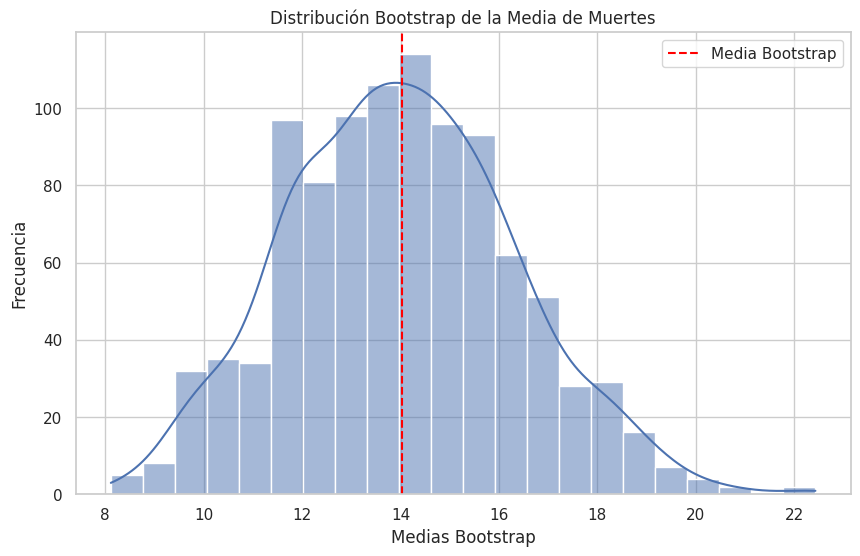

Puntajes de validación cruzada: [0.02315004 0.74555784 0.42109507 0.18283179 0.12905166]
Promedio de validación cruzada: 0.3003372822121698


In [31]:
# Definir la variable numérica de interés
variable_interes = 'Deaths'
n_bootstrap = 1000
alpha = 0.05  # Nivel de confianza del 95%

# Bootstrap
bootstrap_samples = np.random.choice(df[variable_interes].dropna(),
                                      size=(n_bootstrap, len(df[variable_interes].dropna())),
                                      replace=True)

# Calcular estadísticas de cada muestra bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Asimetría y Curtosis
asimetria = skew(bootstrap_means)
curtosis_val = kurtosis(bootstrap_means)

# Error estándar
error_estandar = np.std(bootstrap_means)

# Intervalo de confianza
ci_lower = np.percentile(bootstrap_means, 100 * (alpha / 2))
ci_upper = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

# Resultados
print(f'Distribución de {variable_interes}:')
print(f'Asimetría: {asimetria}')
print(f'Curtosis: {curtosis_val}')
print(f'Error estándar: {error_estandar}')
print(f'Intervalo de confianza del {100 * (1 - alpha)}%: [{ci_lower}, {ci_upper}]')

# Visualización de la distribución bootstrap
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True)
plt.title('Distribución Bootstrap de la Media de Muertes')
plt.xlabel('Medias Bootstrap')
plt.ylabel('Frecuencia')
plt.axvline(x=np.mean(bootstrap_means), color='red', linestyle='--', label='Media Bootstrap')
plt.legend()
plt.show()

# Regresión Lineal Múltiple (usando 'Deaths' como variable dependiente)
X = df[['Recovered']]
y = df[variable_interes]

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Validación cruzada
scores = cross_val_score(modelo, X, y, cv=5)  # 5 iteraciones de K-fold
print(f'Puntajes de validación cruzada: {scores}')
print(f'Promedio de validación cruzada: {np.mean(scores)}')


# VISUALIZACIÓN DE DATOS AVANZADA



*   Scatterplots por Categorías (la relación entre muertes y recuperaciones divididas por región.




# APLICACIÓN DE MACHINE LEARNING APRENDIZAJE SUPERVIZADO Y NO SUPERVISADO

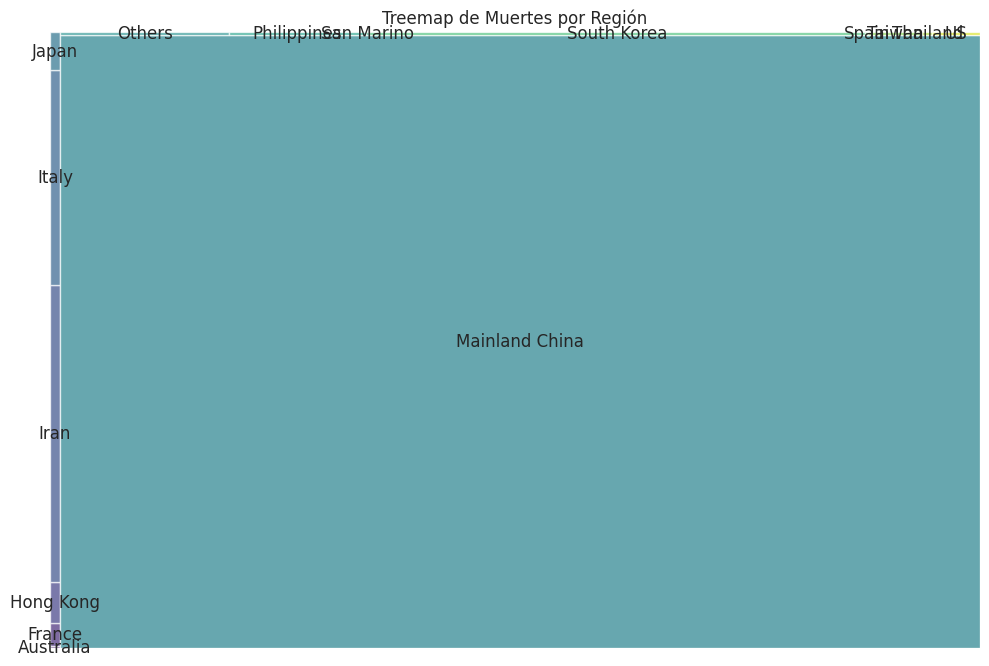

In [32]:
import squarify
if 'Region' in df.columns and 'Deaths' in df.columns:
    # Calcular totales de muertes por región
    totales_muertes = df.groupby('Region')['Deaths'].sum().reset_index()

    # Filtrar para eliminar regiones con cero muertes
    totales_muertes = totales_muertes[totales_muertes['Deaths'] > 0]

    # Comprobar si hay datos para graficar
    if not totales_muertes.empty:
        # Crear el treemap
        plt.figure(figsize=(12, 8))
        squarify.plot(sizes=totales_muertes['Deaths'],
                      label=totales_muertes['Region'],
                      alpha=.7, color=sns.color_palette("viridis", len(totales_muertes)))
        plt.title('Treemap de Muertes por Región')
        plt.axis('off')
        plt.show()
    else:
        print("No hay muertes para graficar.")
else:
    print("El DataFrame no contiene las columnas 'Region' y 'Deaths'.")


NO SUPERVISADO

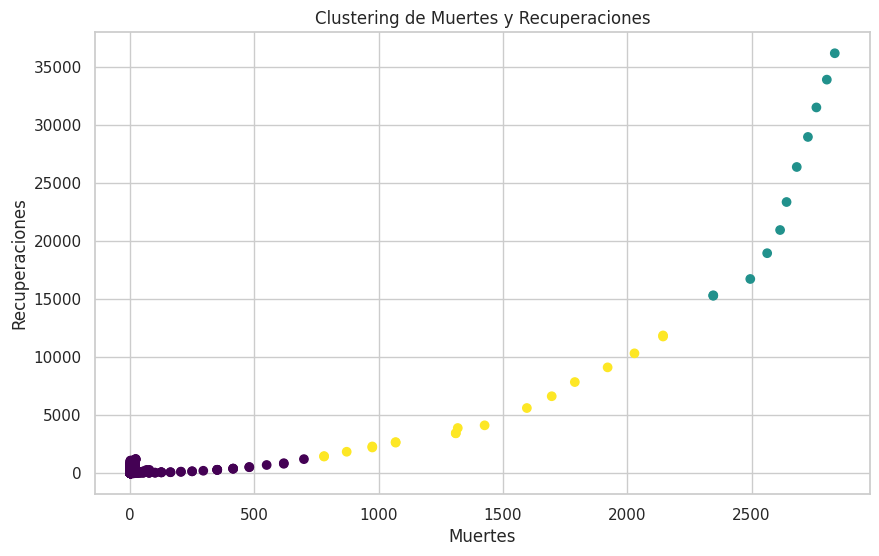

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = df[['Deaths', 'Recovered']].dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
features['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(features['Deaths'], features['Recovered'], c=features['Cluster'], cmap='viridis')
plt.title('Clustering de Muertes y Recuperaciones')
plt.xlabel('Muertes')
plt.ylabel('Recuperaciones')
plt.show()


SUPERVISADO

Error Cuadrático Medio: 180085.79870319332
R^2 Score: 0.7882076713516596


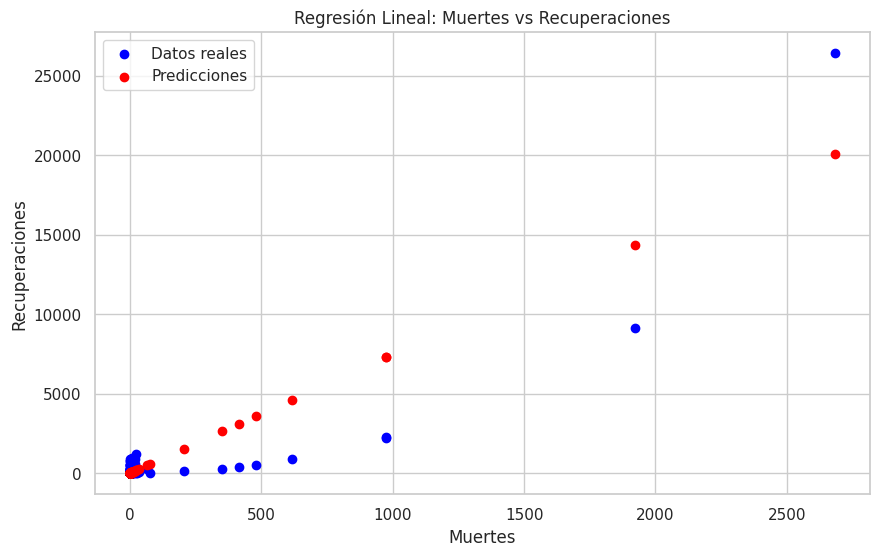

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Deaths']].dropna()
y = df.loc[X.index, 'Recovered']
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R^2 Score: {r2}')

# Visualizar la regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Muertes')
plt.ylabel('Recuperaciones')
plt.title('Regresión Lineal: Muertes vs Recuperaciones')
plt.legend()
plt.show()
